In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load the data
df = pd.read_csv('aerofit_treadmill_data.csv')


In [5]:

display(df.head())

# Checks if there are any missing values
display("Any NaN values?")
display(df.isnull().values.any())

# Check the number of missing values in each column
display(df.isnull().sum())

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


'Any NaN values?'

np.False_

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [6]:
# Checking the data types
df.dtypes

# Changing the object data type into string
df['Product'] = df['Product'].astype('string')
df['Gender'] = df['Gender'].astype('string')
df['MaritalStatus'] = df['MaritalStatus'].astype('string')

# Renaming columns
df.rename(columns={'Education': 'Years_Of_Eduaction'}, inplace=True)

# After changing the data types
df.dtypes

Product               string[python]
Age                            int64
Gender                string[python]
Years_Of_Eduaction             int64
MaritalStatus         string[python]
Usage                          int64
Fitness                        int64
Income                         int64
Miles                          int64
dtype: object

In [7]:
# Summary Statistics for Numerical Columns
df.describe()

# Counts for Categorical Columns
print("Count per Product:")
display(df['Product'].value_counts())
print()

print("Count per Gender:")
display(df['Gender'].value_counts())
print()

print("Count per Marital Status:")
display(df['MaritalStatus'].value_counts())
print()

# Group by 'Product' and describe()
grouped_summary = df.groupby('Product').describe()

# Flatten the multi-index column headers
grouped_summary.columns = ['_'.join(col).strip() for col in grouped_summary.columns.values]

# Show all columns
pd.set_option('display.max_columns', None)

# Reset index to keep 'Product' as a normal column
grouped_summary = grouped_summary.reset_index()

display(grouped_summary)

# Correlation matrix with numeric data types only
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

Count per Product:


Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: Int64


Count per Gender:


Gender
Male      104
Female     76
Name: count, dtype: Int64


Count per Marital Status:


MaritalStatus
Partnered    107
Single        73
Name: count, dtype: Int64

,Product,Age_count,Age_mean,Age_std,Age_min,Age_25%,Age_50%,Age_75%,Age_max,Years_Of_Eduaction_count,Years_Of_Eduaction_mean,Years_Of_Eduaction_std,Years_Of_Eduaction_min,Years_Of_Eduaction_25%,Years_Of_Eduaction_50%,Years_Of_Eduaction_75%,Years_Of_Eduaction_max,Usage_count,Usage_mean,Usage_std,Usage_min,Usage_25%,Usage_50%,Usage_75%,Usage_max,Fitness_count,Fitness_mean,Fitness_std,Fitness_min,Fitness_25%,Fitness_50%,Fitness_75%,Fitness_max,Income_count,Income_mean,Income_std,Income_min,Income_25%,Income_50%,Income_75%,Income_max,Miles_count,Miles_mean,Miles_std,Miles_min,Miles_25%,Miles_50%,Miles_75%,Miles_max
0,KP281,80.0,28.55,7.221452,18.0,23.00,26.0,33.00,50.0,80.0,15.037500,1.216383,12.0,14.0,16.0,16.0,18.0,80.0,3.087500,0.782624,2.0,3.0,3.0,4.00,5.0,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0,80.0,46418.025,9075.783190,29562.0,38658.00,46617.0,53439.0,68220.0,80.0,82.787500,28.874102,38.0,66.0,85.0,94.0,188.0
1,KP481,60.0,28.90,6.645248,19.0,24.00,26.0,33.25,48.0,60.0,15.116667,1.222552,12.0,14.0,16.0,16.0,18.0,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0,60.0,2.9000,0.629770,1.0,3.0,3.0,3.0,4.0,60.0,48973.650,8653.989388,31836.0,44911.50,49459.5,53439.0,67083.0,60.0,87.933333,33.263135,21.0,64.0,85.0,106.0,212.0
2,KP781,40.0,29.10,6.971738,22.0,24.75,27.0,30.25,48.0,40.0,17.325000,1.639066,14.0,16.0,18.0,18.0,21.0,40.0,4.775000,0.946993,3.0,4.0,5.0,5.00,7.0,40.0,4.6250,0.667467,3.0,4.0,5.0,5.0,5.0,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.0,104581.0,40.0,166.900000,60.066544,80.0,120.0,160.0,200.0,360.0


                         Age  Years_Of_Eduaction     Usage   Fitness  \
Age                 1.000000            0.280496  0.015064  0.061105   
Years_Of_Eduaction  0.280496            1.000000  0.395155  0.410581   
Usage               0.015064            0.395155  1.000000  0.668606   
Fitness             0.061105            0.410581  0.668606  1.000000   
Income              0.513414            0.625827  0.519537  0.535005   
Miles               0.036618            0.307284  0.759130  0.785702   

                      Income     Miles  
Age                 0.513414  0.036618  
Years_Of_Eduaction  0.625827  0.307284  
Usage               0.519537  0.759130  
Fitness             0.535005  0.785702  
Income              1.000000  0.543473  
Miles               0.543473  1.000000  


In [8]:
# Created a mapping for the new columns
product_mapping = {
    'KP281': 0,
    'KP481': 1,
    'KP781': 2
}
df_encoded = df

# Based on the Product column values the new column will either get 0, 1, 2
df_encoded['Product_Encoding'] = df_encoded['Product'].map(product_mapping)

df_encoded.select_dtypes(include=['number']).corr()

,Age,Years_Of_Eduaction,Usage,Fitness,Income,Miles,Product_Encoding
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.032225
Years_Of_Eduaction,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.495018
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.537447
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.594883
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.624168
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.571596
Product_Encoding,0.032225,0.495018,0.537447,0.594883,0.624168,0.571596,1.000000


Implications for the Business:

- KP781 buyers (higher product encoding) are likely to have higher income (62.4%), fitness (59.4%), and treadmill usage (53.7 %). Based on correlation matrix and statistics summary (describe()).

- KP281 buyers (entry-level treadmills) may have lower income and fitness levels.

- Treadmill usage and fitness are key differentiators across treadmill models.

Targeted Marketing: KP781: Focus on high-income, high-fitness individuals. KP481: Mid-range customers with moderate fitness and income. KP281: Budget-conscious consumers who may need incentives to increase usage.

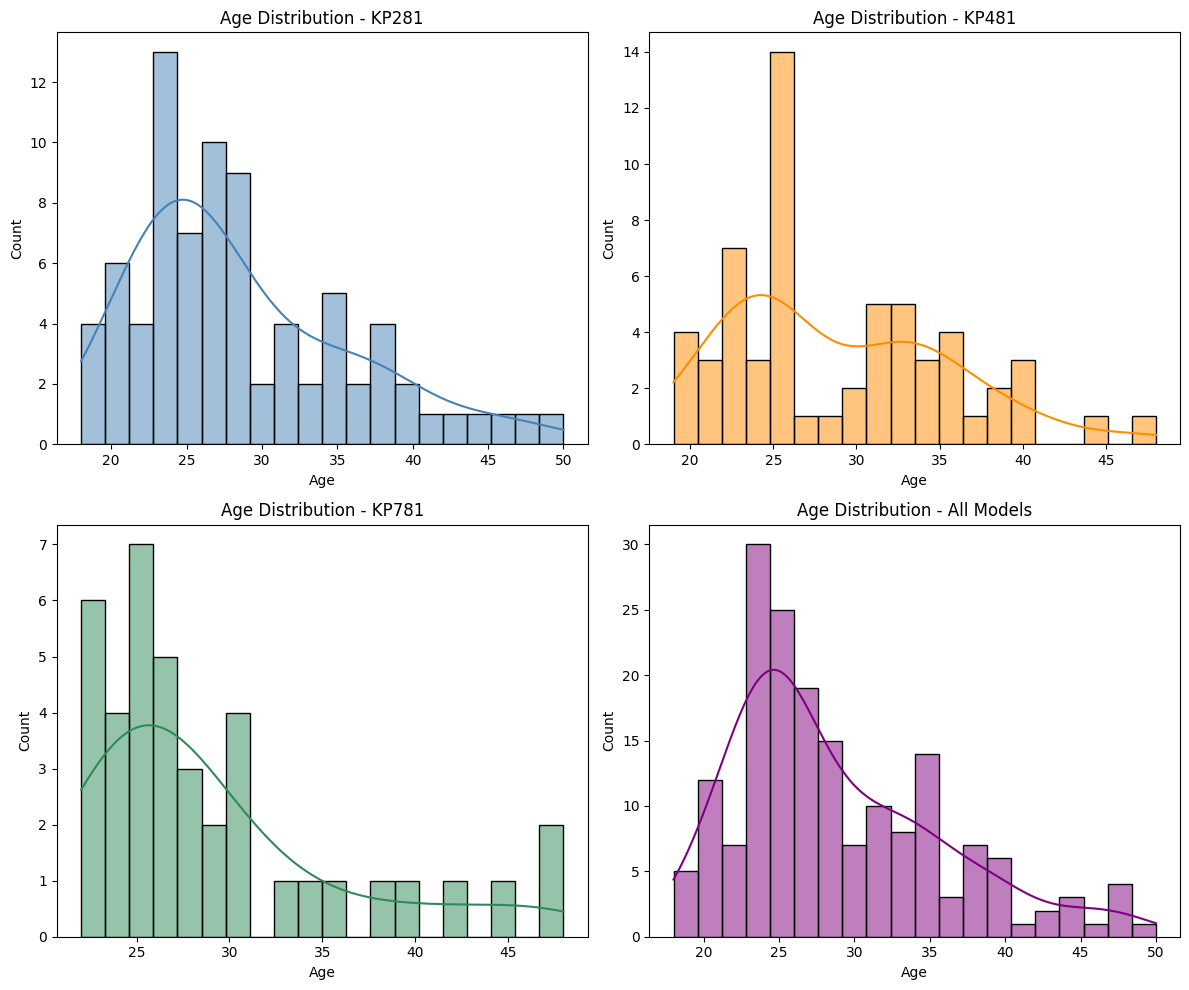

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_KP281 = df_encoded[df_encoded['Product_Encoding'] == 0]
df_KP481 = df_encoded[df_encoded['Product_Encoding'] == 1]
df_KP781 = df_encoded[df_encoded['Product_Encoding'] == 2]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# KP281 - Entry Level (Top Left)
sns.histplot(df_KP281['Age'], bins=20, kde=True, color="steelblue", ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution - KP281")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")

# KP481 - Mid Level (Top Right)
sns.histplot(df_KP481['Age'], bins=20, kde=True, color="darkorange", ax=axes[0, 1])
axes[0, 1].set_title("Age Distribution - KP481")
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Count")

# KP781 - Advanced (Bottom Left)
sns.histplot(df_KP781['Age'], bins=20, kde=True, color="seagreen", ax=axes[1, 0])
axes[1, 0].set_title("Age Distribution - KP781")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Count")

# All Models Combined (Bottom Right)
sns.histplot(df_encoded['Age'], bins=20, kde=True, color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Age Distribution - All Models")
axes[1, 1].set_xlabel("Age")
axes[1, 1].set_ylabel("Count")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Histogram Analysis

- Based on the four histogram all of them have a uni-model around age 25 showing that there is no correlation between different product models and age
- Since all are centered around age 25 that means the company should focus general marketing of treadmills on those age groups.

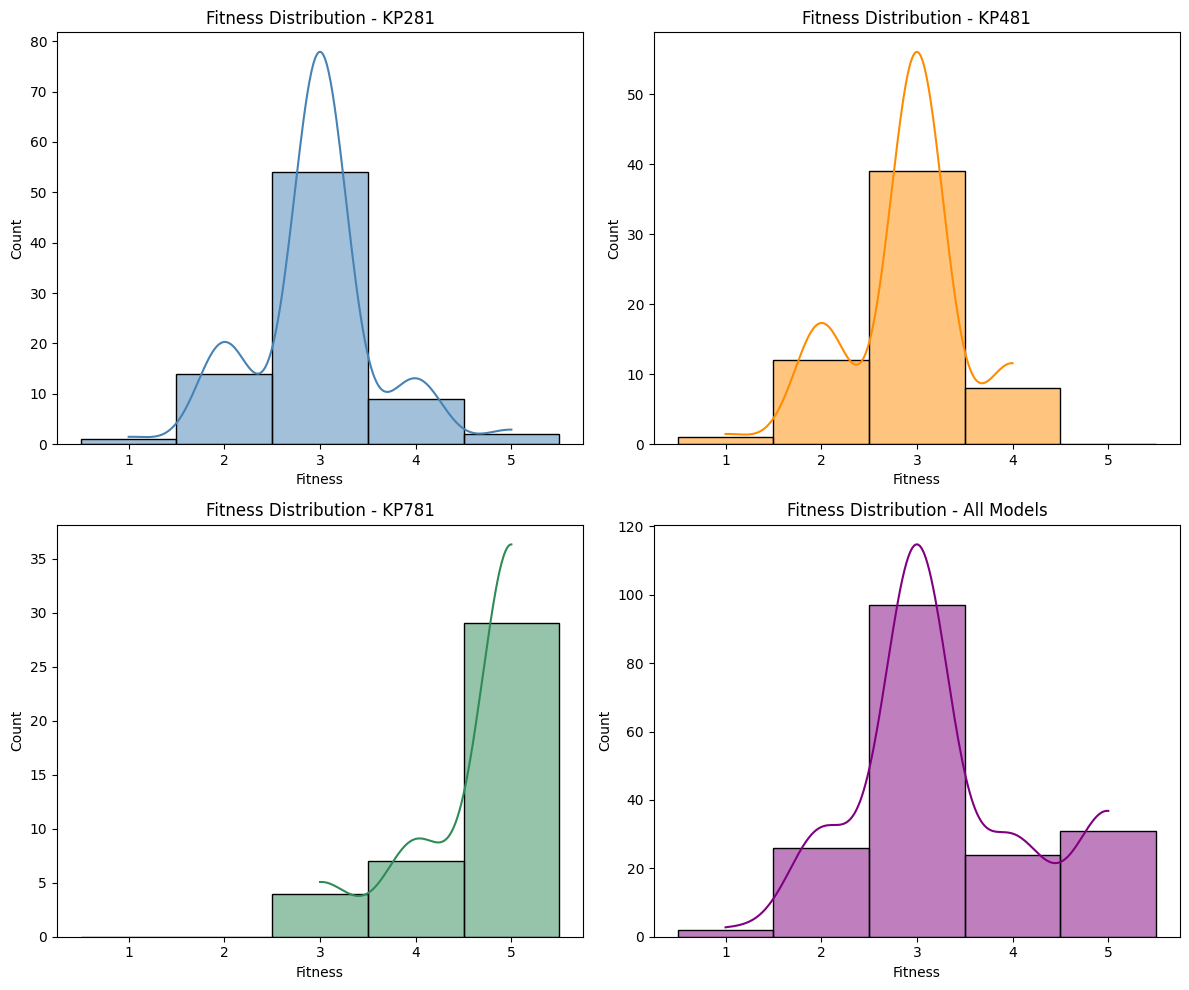

In [10]:


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define fitness levels (integer bins)
fitness_levels = [1, 2, 3, 4, 5]

# KP281 - Entry Level (Top Left)
sns.histplot(df_KP281['Fitness'], bins=5, binrange=(0.5, 5.5), kde=True, color="steelblue", ax=axes[0, 0])
axes[0, 0].set_title("Fitness Distribution - KP281")
axes[0, 0].set_xlabel("Fitness")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_xticks(fitness_levels)

# KP481 - Mid Level (Top Right)
sns.histplot(df_KP481['Fitness'], bins=5, binrange=(0.5, 5.5), kde=True, color="darkorange", ax=axes[0, 1])
axes[0, 1].set_title("Fitness Distribution - KP481")
axes[0, 1].set_xlabel("Fitness")
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_xticks(fitness_levels)

# KP781 - Advanced (Bottom Left)
sns.histplot(df_KP781['Fitness'], bins=5, binrange=(0.5, 5.5), kde=True, color="seagreen", ax=axes[1, 0])
axes[1, 0].set_title("Fitness Distribution - KP781")
axes[1, 0].set_xlabel("Fitness")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_xticks(fitness_levels)

# All Models Combined (Bottom Right)
sns.histplot(df_encoded['Fitness'], bins=5, binrange=(0.5, 5.5), kde=True, color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Fitness Distribution - All Models")
axes[1, 1].set_xlabel("Fitness")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_xticks(fitness_levels)

# Adjust layout
plt.tight_layout()
plt.show()


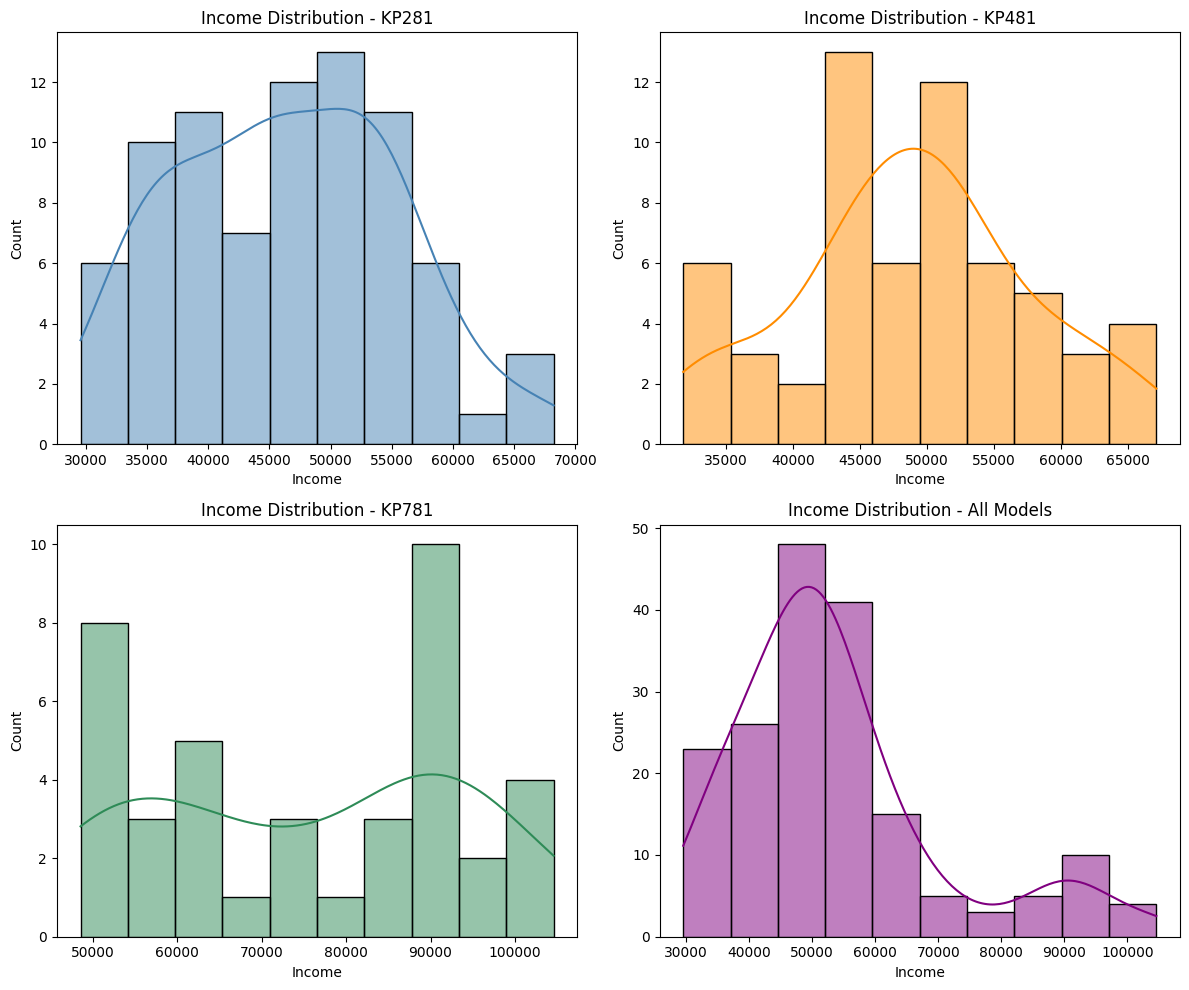

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# KP281 - Entry Level (Top Left)
sns.histplot(df_KP281['Income'], bins=10, kde=True, color="steelblue", ax=axes[0, 0])
axes[0, 0].set_title("Income Distribution - KP281")
axes[0, 0].set_xlabel("Income")
axes[0, 0].set_ylabel("Count")

# KP481 - Mid Level (Top Right)
sns.histplot(df_KP481['Income'], bins=10, kde=True, color="darkorange", ax=axes[0, 1])
axes[0, 1].set_title("Income Distribution - KP481")
axes[0, 1].set_xlabel("Income")
axes[0, 1].set_ylabel("Count")

# KP781 - Advanced (Bottom Left)
sns.histplot(df_KP781['Income'], bins=10, kde=True, color="seagreen", ax=axes[1, 0])
axes[1, 0].set_title("Income Distribution - KP781")
axes[1, 0].set_xlabel("Income")
axes[1, 0].set_ylabel("Count")

# All Models Combined (Bottom Right)
sns.histplot(df_encoded['Income'], bins=10, kde=True, color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Income Distribution - All Models")
axes[1, 1].set_xlabel("Income")
axes[1, 1].set_ylabel("Count")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
product_gender_contingency = pd.crosstab(df_encoded['Product_Encoding'], df_encoded['Gender'])
display(product_gender_contingency)

import pandas as pd

# Compute raw counts
product_marital_contingency = pd.crosstab(df_encoded['Product_Encoding'], df_encoded['MaritalStatus'])

# Compute row-wise percentages (so each row sums to 100%)
product_marital_percentage = pd.crosstab(df_encoded['Product_Encoding'], df_encoded['MaritalStatus'], normalize='index') * 100

# Combine both tables into a single table (formatting as "count (percentage%)")
product_marital_combined = product_marital_contingency.astype(str) + " (" + product_marital_percentage.round(1).astype(str) + "%)"

# Display the final formatted table
display(product_marital_combined)



Gender,Female,Male
Product_Encoding,,
0,40,40
1,29,31
2,7,33


MaritalStatus,Partnered,Single
Product_Encoding,,
0,48 (60.0%),32 (40.0%)
1,36 (60.0%),24 (40.0%)
2,23 (57.5%),17 (42.5%)


Product vs Gender Contingency Table Analysis

- For KP281 and KP481 there is no real difference between male and female, but for KP781 82.5% of buyers were male meaning there should be more advertising for male customers for the high-end treadmill model

Product vs Marital Status Contingency Table Analysis

- For all three models there is no difference between single or partnered. Meaning marital status is NOT a strong differentiator for treadmill choice.
- Since for all three models the majority of buyers were partnered it would still be better to advertise more to the couples.